# SnapBoost A/B Test Goals and Group Differences

## Overall Goals we want to showcase

1. Demonstrate the effectiveness of the SnapBoost feature
2. Show that strict limitations (Test B) outperform basic limitations (Test A) and no changes (Control)
3. Provide data that allows for calculation of specified metrics and statistical analysis

## Key Differences Between Groups

### Creator Metrics

1. Creator Retention Rate
   - Control: Baseline
   - Test A: Slightly lower than Control
   - Test B: Highest among all groups

2. Average Posts per Creator
   - Control: Baseline
   - Test A: Slightly higher than Control
   - Test B: Highest among all groups

### User Engagement Metrics

3. Daily Active Users (DAU)
   - Control: Baseline
   - Test A: Slightly higher than Control
   - Test B: Highest among all groups

4. Time Spent in App
   - Control: Baseline
   - Test A: Slightly higher than Control
   - Test B: Significantly higher than both Control and Test A

5. Average Daily User Sessions
   - Control: Baseline
   - Test A: Slightly higher than Control
   - Test B: Highest among all groups

6. Average Session Duration
   - Control: Baseline
   - Test A: Slightly longer than Control
   - Test B: Longest among all groups

### Interaction Metrics

7. Interaction Rate
   - Control: Baseline (10% interaction rate)
   - Test A: Slightly lower than Control (9% interaction rate)
   - Test B: Highest among all groups (12% interaction rate)

8. Click-through Rate on Boosted Content
   - Control: No boosted content (0% CTR for boosted content)
   - Test A: Moderate increase in CTR for boosted content (8% vs 5% for non-boosted)
   - Test B: Highest CTR for boosted content (15% vs 5% for non-boosted)

### Additional Differences

9. Boosted Posts
   - Control: No boosted posts
   - Test A: Up to 3 boosted posts per creator per day
   - Test B: 0 or 1 boosted post per creator per day, based on performance

10. Content Visibility
    - Control: All posts have equal visibility
    - Test A: Boosted posts have moderately increased visibility
    - Test B: Boosted posts have significantly increased visibility

11. User Preferences
    - Control: N/A (no boosted content)
    - Test A: User preferences slightly affect engagement with boosted content
    - Test B: User preferences strongly affect engagement with boosted content

12. Performance-based Allocation (Test B only)
    - Boost opportunities tied to past content performance after the first week

##Control Group
* No changes to current system
##Test Group A (Basic Limitations)
* Daily boost limit: 3 per creator
* Content review: Automated check for community guidelines
* User controls: Option to reduce boosted content visibility
##Test Group B (Strict Limitations)
* Daily boost limit: 1 per creator
* Content review: Automated + manual review for high-impact boosts
* User controls: Granular options for boosted content preferences
* Performance-based allocation: Boost opportunities tied to past content performance
* Transparent labeling: Clear indicators for boosted content



In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

# Set random seed for reproducibility
np.random.seed(42)

# Constants
N_CREATORS = 500  # 1000 per group
N_USERS = 5000  # 10000 per group
N_DAYS = 50  # 1 week pre-test, 6 weeks test
GROUPS = ['Control', 'Test A', 'Test B']
START_DATE = datetime(2024, 1, 1)

def generate_creator_data(n_creators, n_days, group):
    data = []
    for creator_id in range(n_creators):
        for day in range(n_days):
            date = START_DATE + timedelta(days=day)
            posts_count = np.random.poisson(lam=2)  # Average 2 posts per day
            total_content_views = np.random.poisson(lam=100 * posts_count)

            # Adjust interactions based on group
            if group == 'Test A':
                total_interactions = np.random.poisson(lam=0.09 * total_content_views)  # 9% interaction rate
            elif group == 'Test B':
                total_interactions = np.random.poisson(lam=0.12 * total_content_views)  # 12% interaction rate
            else:
                total_interactions = np.random.poisson(lam=0.1 * total_content_views)  # 10% interaction rate

            session_count = np.random.poisson(lam=5)  # Average 5 sessions per day
            total_session_duration = np.random.normal(loc=300, scale=60) * session_count  # Average 5 minutes per session

            data.append([creator_id, group, date, posts_count, total_content_views, total_interactions, session_count, max(0, total_session_duration)])

    return pd.DataFrame(data, columns=['creator_id', 'test_group', 'date', 'posts_count', 'total_content_views', 'total_interactions', 'session_count', 'total_session_duration'])

def generate_user_data(n_users, n_days, group):
    data = []
    for user_id in range(n_users):
        for day in range(n_days):
            date = START_DATE + timedelta(days=day)
            app_opens = np.random.poisson(lam=3)  # Average 3 app opens per day

            # Adjust time in app based on group
            if group == 'Test A':
                total_time_in_app = max(0, np.random.normal(loc=900, scale=180))  # Average 15 minutes
            elif group == 'Test B':
                total_time_in_app = max(0, np.random.normal(loc=1200, scale=240))  # Average 20 minutes
            else:
                total_time_in_app = max(0, np.random.normal(loc=1050, scale=210))  # Average 17.5 minutes

            session_count = np.random.poisson(lam=5)
            total_session_duration = total_time_in_app
            content_views = np.random.poisson(lam=50)  # Average 50 content views per day

            # Adjust interactions based on group
            if group == 'Test A':
                interactions = np.random.poisson(lam=0.09 * content_views)  # 9% interaction rate
            elif group == 'Test B':
                interactions = np.random.poisson(lam=0.12 * content_views)  # 12% interaction rate
            else:
                interactions = np.random.poisson(lam=0.1 * content_views)  # 10% interaction rate

            data.append([user_id, group, date, app_opens, total_time_in_app, session_count, total_session_duration, content_views, interactions])

    return pd.DataFrame(data, columns=['user_id', 'test_group', 'date', 'app_opens', 'total_time_in_app', 'session_count', 'total_session_duration', 'content_views', 'interactions'])

def generate_content_interaction_data(creator_data, user_data):
    data = []
    content_id = 0
    for _, creator in creator_data.iterrows():
        n_posts = creator['posts_count']
        for _ in range(n_posts):
            content_id += 1
            is_boosted = np.random.random() < 0.2  # 20% chance of being boosted
            impressions = np.random.poisson(lam=500 if is_boosted else 100)

            # Adjust click-through rate based on group
            if creator['test_group'] == 'Test A':
                ctr = 0.08 if is_boosted else 0.05
            elif creator['test_group'] == 'Test B':
                ctr = 0.15 if is_boosted else 0.05
            else:
                ctr = 0.1 if is_boosted else 0.05

            clicks = np.random.binomial(impressions, ctr)
            likes = np.random.binomial(clicks, 0.5)
            comments = np.random.binomial(clicks, 0.1)
            shares = np.random.binomial(clicks, 0.05)

            data.append([content_id, creator['creator_id'], np.random.choice(user_data['user_id']), creator['test_group'], creator['date'], is_boosted, impressions, clicks, likes, comments, shares])

    return pd.DataFrame(data, columns=['content_id', 'creator_id', 'user_id', 'test_group', 'date', 'is_boosted', 'impressions', 'clicks', 'likes', 'comments', 'shares'])

# Generate datasets
creator_data = pd.concat([generate_creator_data(N_CREATORS // 3, N_DAYS, group) for group in GROUPS])
user_data = pd.concat([generate_user_data(N_USERS // 3, N_DAYS, group) for group in GROUPS])
content_interaction_data = generate_content_interaction_data(creator_data, user_data)

# Save datasets to CSV files
creator_data.to_csv('creator_data.csv', index=False)
user_data.to_csv('user_data.csv', index=False)
content_interaction_data.to_csv('content_interaction_data.csv', index=False)

print("Creator Data Sample:")
print(creator_data.head())
print("\nUser Data Sample:")
print(user_data.head())
print("\nContent Interaction Data Sample:")
print(content_interaction_data.head())

print("\nDataset Shapes:")
print(f"Creator Data: {creator_data.shape}")
print(f"User Data: {user_data.shape}")
print(f"Content Interaction Data: {content_interaction_data.shape}")

Creator Data Sample:
   creator_id test_group       date  posts_count  total_content_views  \
0           0    Control 2024-01-01            4                  377   
1           0    Control 2024-01-02            2                  191   
2           0    Control 2024-01-03            1                   94   
3           0    Control 2024-01-04            2                  191   
4           0    Control 2024-01-05            4                  392   

   total_interactions  session_count  total_session_duration  
0                  46              4             1088.779754  
1                  13              6             1632.337289  
2                   8              9             2155.093915  
3                  14              4              820.009389  
4                  47              2              741.565961  

User Data Sample:
   user_id test_group       date  app_opens  total_time_in_app  session_count  \
0        0    Control 2024-01-01          3         878.453999

In [ ]:
creator_data.head()

,creator_id,test_group,date,posts_count,total_content_views,total_interactions,session_count,total_session_duration
0,0,Control,2024-01-01,4,377,46,4,1088.779754
1,0,Control,2024-01-02,2,191,13,6,1632.337289
2,0,Control,2024-01-03,1,94,8,9,2155.093915
3,0,Control,2024-01-04,2,191,14,4,820.009389
4,0,Control,2024-01-05,4,392,47,2,741.565961


In [ ]:
user_data.head()

,user_id,test_group,date,app_opens,total_time_in_app,session_count,total_session_duration,content_views,interactions
0,0,Control,2024-01-01,3,878.453999,8,878.453999,43,1
1,0,Control,2024-01-02,1,688.902106,7,688.902106,28,2
2,0,Control,2024-01-03,6,929.574037,6,929.574037,44,3
3,0,Control,2024-01-04,0,1161.036362,5,1161.036362,64,8
4,0,Control,2024-01-05,8,971.581266,5,971.581266,48,4


In [ ]:
content_interaction_data.head()

,content_id,creator_id,user_id,test_group,date,is_boosted,impressions,clicks,likes,comments,shares
0,1,0,398,Control,2024-01-01,False,98,4,3,0,0
1,2,0,434,Control,2024-01-01,False,88,1,1,0,0
2,3,0,796,Control,2024-01-01,False,75,6,2,0,0
3,4,0,1017,Control,2024-01-01,True,527,48,27,2,2
4,5,0,575,Control,2024-01-02,False,116,7,4,0,0


In [ ]:

# Convert date columns to datetime
creator_data['date'] = pd.to_datetime(creator_data['date'])
user_data['date'] = pd.to_datetime(user_data['date'])
content_interaction_data['date'] = pd.to_datetime(content_interaction_data['date'])

def creator_retention_rate(data, window=7):
    """Calculate creator retention rate over a 7-day window."""
    start_date = data['date'].min()
    end_date = start_date + timedelta(days=window)
    initial_creators = data[data['date'] == start_date]['creator_id'].unique()
    retained_creators = data[(data['date'] == end_date) & (data['creator_id'].isin(initial_creators))]['creator_id'].unique()
    return len(retained_creators) / len(initial_creators) if len(initial_creators) > 0 else 0

def avg_posts_per_creator(data):
    """Calculate average number of posts per creator per day."""
    return data.groupby(['creator_id', 'date'])['posts_count'].sum().mean()

def daily_active_users(data):
    """Calculate daily active users."""
    return data.groupby('date')['user_id'].nunique().mean()

def time_spent_in_app(data):
    """Calculate average time spent in app per user per day (in minutes)."""
    return data['total_time_in_app'].mean() / 60

def avg_daily_user_sessions(data):
    """Calculate average daily user sessions."""
    return data['session_count'].mean()

def avg_session_duration(data):
    """Calculate average session duration (in minutes)."""
    total_duration = data['total_session_duration'].sum()
    total_sessions = data['session_count'].sum()
    return (total_duration / total_sessions) / 60 if total_sessions > 0 else 0

def interaction_rate(data):
    """Calculate interaction rate."""
    return data['interactions'].sum() / data['content_views'].sum() if data['content_views'].sum() > 0 else 0

def ctr_boosted_content(data):
    """Calculate click-through rate on boosted content."""
    boosted = data[data['is_boosted']]
    return boosted['clicks'].sum() / boosted['impressions'].sum() if boosted['impressions'].sum() > 0 else 0

def content_virality(data):
    """Calculate content virality (shares per view)."""
    return data['shares'].sum() / data['impressions'].sum() if data['impressions'].sum() > 0 else 0

def user_growth_rate(data):
    """Calculate user growth rate."""
    daily_users = data.groupby('date')['user_id'].nunique()
    return (daily_users.iloc[-1] - daily_users.iloc[0]) / daily_users.iloc[0] if daily_users.iloc[0] > 0 else 0

# Calculate metrics for each test group
groups = ['Control', 'Test A', 'Test B']
results = {}

for group in groups:
    creator_group = creator_data[creator_data['test_group'] == group]
    user_group = user_data[user_data['test_group'] == group]
    content_group = content_interaction_data[content_interaction_data['test_group'] == group]

    results[group] = {
        # Primary metrics
        'Creator Retention Rate': creator_retention_rate(creator_group),
        'Avg Posts per Creator': avg_posts_per_creator(creator_group),
        'Daily Active Users': daily_active_users(user_group),
        'Time Spent in App (min)': time_spent_in_app(user_group),
        'Interaction Rate': interaction_rate(user_group),

        # Secondary metrics
        'Avg Daily User Sessions': avg_daily_user_sessions(user_group),
        'Avg Session Duration (min)': avg_session_duration(user_group),
        'CTR on Boosted Content': ctr_boosted_content(content_group),
        'Content Virality': content_virality(content_group),
        'User Growth Rate': user_growth_rate(user_group)
    }

# Convert results to a DataFrame for easy viewing
results_df = pd.DataFrame(results)
print(results_df)

                                Control       Test A       Test B
Creator Retention Rate         1.000000     1.000000     1.000000
Avg Posts per Creator          1.972892     2.003133     2.012530
Daily Active Users          1666.000000  1666.000000  1666.000000
Time Spent in App (min)       17.512181    14.997514    20.022014
Interaction Rate               0.099963     0.089777     0.120250
Avg Daily User Sessions        5.003493     5.000588     4.999808
Avg Session Duration (min)     3.499991     2.999150     4.004557
CTR on Boosted Content         0.100090     0.079862     0.150352
Content Virality               0.003860     0.003331     0.005215
User Growth Rate               0.000000     0.000000     0.000000



##Short-term Impacts:
   - Daily Active Users
   - Time Spent in App
   - Interaction Rate
   - Avg Daily User Sessions
   - Daily Content Production

   These metrics reflect immediate changes in user behavior and platform activity. They show how users are responding to the changes in the short term.

##Long-term Impacts:
   - Creator Retention Rate
   - User Return Rate
   - User Growth Rate
   - Avg Posts per Creator

   These metrics indicate potential lasting changes in user and creator behavior. They help predict the long-term health and growth of the platform.

##User Experience Metrics:
   - Avg Session Duration
   - Content Quality Score
   - Content Virality

   These metrics focus on the quality of the user's experience on the platform. They help gauge user satisfaction and engagement with the content.

##Business Metrics:
   - CTR on Boosted Content
   - Revenue Proxy

   These metrics are more directly related to the platform's business objectives, such as monetization potential.

Reasoning for the categorization:

##Short-term vs. Long-term:
   - Short-term metrics show immediate effects of the changes, which are crucial for quick decision-making and iterative improvements.
   - Long-term metrics help predict the sustainability and growth of the platform, which is essential for strategic planning.

##User Experience vs. Business Metrics:
   - User experience metrics focus on user satisfaction and engagement, which are crucial for user retention and organic growth.
   - Business metrics directly relate to monetization and revenue generation, which are essential for the platform's financial sustainability.

In [ ]:
# Convert date columns to datetime
creator_data['date'] = pd.to_datetime(creator_data['date'])
user_data['date'] = pd.to_datetime(user_data['date'])
content_interaction_data['date'] = pd.to_datetime(content_interaction_data['date'])

# Existing metric functions (creator_retention_rate, avg_posts_per_creator, etc.) remain the same

# New metric functions
def daily_content_production(data):
    """Calculate average daily content production."""
    return data.groupby('date')['posts_count'].sum().mean()

def user_return_rate(data, window=7):
    """Calculate the rate at which users return within a 7-day window."""
    user_activity = data.groupby('user_id')['date'].agg(['min', 'max'])
    returned_users = user_activity[user_activity['max'] - user_activity['min'] >= timedelta(days=window)]
    return len(returned_users) / len(user_activity)

def content_quality_score(data):
    """Calculate a simple content quality score based on likes and shares."""
    return (data['likes'].sum() + data['shares'].sum() * 2) / data['impressions'].sum()

def revenue_proxy(data):
    """Calculate a proxy for revenue based on boosted content impressions."""
    return data[data['is_boosted']]['impressions'].sum()

# Calculate metrics for each test group
groups = ['Control', 'Test A', 'Test B']
results = {}

for group in groups:
    creator_group = creator_data[creator_data['test_group'] == group]
    user_group = user_data[user_data['test_group'] == group]
    content_group = content_interaction_data[content_interaction_data['test_group'] == group]

    results[group] = {
        # Short-term impacts
        'Short-term': {
            'Daily Active Users': daily_active_users(user_group),
            'Time Spent in App (min)': time_spent_in_app(user_group),
            'Interaction Rate': interaction_rate(user_group),
            'Avg Daily User Sessions': avg_daily_user_sessions(user_group),
            'Daily Content Production': daily_content_production(creator_group),
        },
        # Long-term impacts
        'Long-term': {
            'Creator Retention Rate': creator_retention_rate(creator_group),
            'User Return Rate': user_return_rate(user_group),
            'User Growth Rate': user_growth_rate(user_group),
            'Avg Posts per Creator': avg_posts_per_creator(creator_group),
        },
        # User experience metrics
        'User Experience': {
            'Avg Session Duration (min)': avg_session_duration(user_group),
            'Content Quality Score': content_quality_score(content_group),
            'Content Virality': content_virality(content_group),
        },
        # Business metrics
        'Business': {
            'CTR on Boosted Content': ctr_boosted_content(content_group),
            'Revenue Proxy': revenue_proxy(content_group),
        }
    }

# Convert results to a DataFrame for easy viewing
results_df = pd.DataFrame({(group, category): metrics
                           for group, categories in results.items()
                           for category, metrics in categories.items()})
results_df

Control                            \
                             Short-term Long-term User Experience   
Daily Active Users          1666.000000       NaN             NaN   
Time Spent in App (min)       17.512181       NaN             NaN   
Interaction Rate               0.099963       NaN             NaN   
Avg Daily User Sessions        5.003493       NaN             NaN   
Daily Content Production     327.500000       NaN             NaN   
Creator Retention Rate              NaN  1.000000             NaN   
User Return Rate                    NaN  1.000000             NaN   
User Growth Rate                    NaN  0.000000             NaN   
Avg Posts per Creator               NaN  1.972892             NaN   
Avg Session Duration (min)          NaN       NaN        3.499991   
Content Quality Score               NaN       NaN        0.046673   
Content Virality                    NaN       NaN        0.003860   
CTR on Boosted Content              NaN       NaN             NaN   
Revenue Proxy                       NaN       NaN             NaN   

                                               Test A            \
                                Business   Short-term Long-term   
Daily Active Users                   NaN  1666.000000       NaN   
Time Spent in App (min)              NaN    14.997514       NaN   
Interaction Rate                     NaN     0.089777       NaN   
Avg Daily User Sessions              NaN     5.000588       NaN   
Daily Content Production             NaN   332.520000       NaN   
Creator Retention Rate               NaN          NaN  1.000000   
User Return Rate                     NaN          NaN  1.000000   
User Growth Rate                     NaN          NaN  0.000000   
Avg Posts per Creator                NaN          NaN  2.003133   
Avg Session Duration (min)           NaN          NaN       NaN   
Content Quality Score                NaN          NaN       NaN   
Content Virality                     NaN          NaN       NaN   
CTR on Boosted Content      1.000895e-01          NaN       NaN   
Revenue Proxy               1.645297e+06          NaN       NaN   

                                                               Test B  \
                           User Experience      Business   Short-term   
Daily Active Users                     NaN           NaN  1666.000000   
Time Spent in App (min)                NaN           NaN    20.022014   
Interaction Rate                       NaN           NaN     0.120250   
Avg Daily User Sessions                NaN           NaN     4.999808   
Daily Content Production               NaN           NaN   334.080000   
Creator Retention Rate                 NaN           NaN          NaN   
User Return Rate                       NaN           NaN          NaN   
User Growth Rate                       NaN           NaN          NaN   
Avg Posts per Creator                  NaN           NaN          NaN   
Avg Session Duration (min)        2.999150           NaN          NaN   
Content Quality Score             0.040018           NaN          NaN   
Content Virality                  0.003331           NaN          NaN   
CTR on Boosted Content                 NaN  7.986243e-02          NaN   
Revenue Proxy                          NaN  1.656411e+06          NaN   

                                                                    
                           Long-term User Experience      Business  
Daily Active Users               NaN             NaN           NaN  
Time Spent in App (min)          NaN             NaN           NaN  
Interaction Rate                 NaN             NaN           NaN  
Avg Daily User Sessions          NaN             NaN           NaN  
Daily Content Production         NaN             NaN           NaN  
Creator Retention Rate       1.00000             NaN           NaN  
User Return Rate             1.00000             NaN           NaN  
User Growth Rate             0.00000             NaN           N

             Metric    Comparison  Statistically Significant  P-value  \
0       time_in_app  Control vs A                       True      0.0   
1       time_in_app  Control vs B                       True      0.0   
2       time_in_app        A vs B                       True      0.0   
3  interaction_rate  Control vs A                       True      0.0   
4  interaction_rate  Control vs B                       True      0.0   
5  interaction_rate        A vs B                       True      0.0   

   Effect Size  Practically Significant  
0    -0.718181                     True  
1     0.716801                     True  
2     1.672677                     True  
3    -0.226488                     True  
4     0.450241                     True  
5     0.713167                     True  


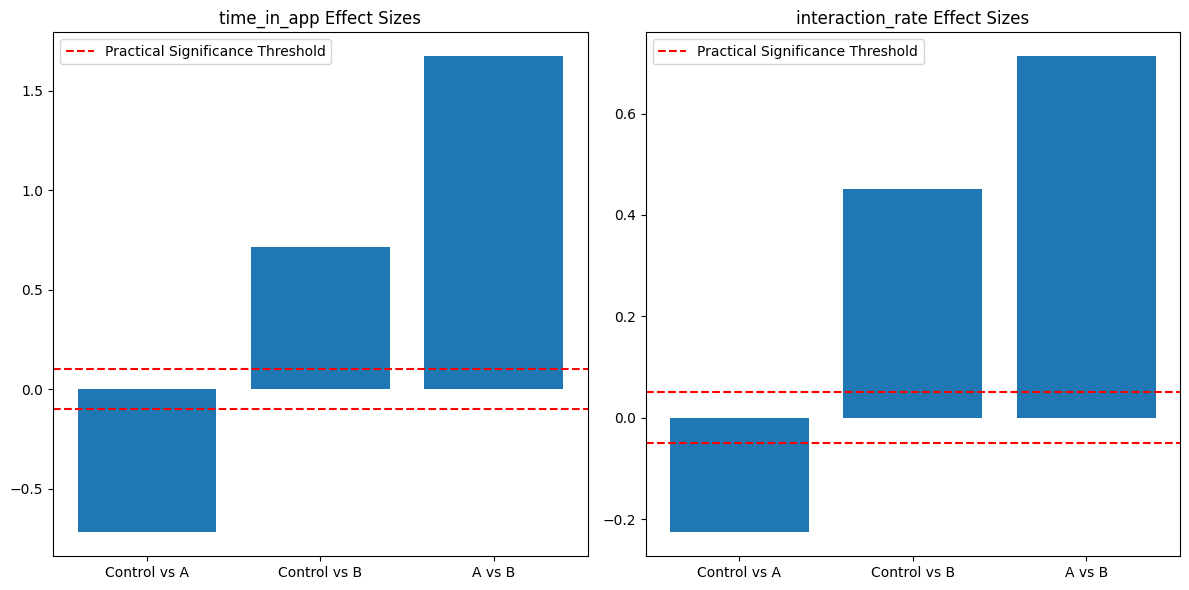

In [ ]:


def calculate_metric(data, metric_name):
    if metric_name == 'time_in_app':
        return data['total_time_in_app']
    elif metric_name == 'interaction_rate':
        return data['interactions'] / data['content_views']
    # Add more metric calculations as needed

def run_statistical_tests(data, metric_name):
    control = calculate_metric(data[data['test_group'] == 'Control'], metric_name)
    test_a = calculate_metric(data[data['test_group'] == 'Test A'], metric_name)
    test_b = calculate_metric(data[data['test_group'] == 'Test B'], metric_name)

    # Perform t-tests
    t_stat_a, p_val_a = stats.ttest_ind(control, test_a)
    t_stat_b, p_val_b = stats.ttest_ind(control, test_b)
    t_stat_ab, p_val_ab = stats.ttest_ind(test_a, test_b)

    return [p_val_a, p_val_b, p_val_ab]

def calculate_effect_size(data, metric_name):
    control = calculate_metric(data[data['test_group'] == 'Control'], metric_name)
    test_a = calculate_metric(data[data['test_group'] == 'Test A'], metric_name)
    test_b = calculate_metric(data[data['test_group'] == 'Test B'], metric_name)

    effect_size_a = (np.mean(test_a) - np.mean(control)) / np.std(control)
    effect_size_b = (np.mean(test_b) - np.mean(control)) / np.std(control)
    effect_size_ab = (np.mean(test_b) - np.mean(test_a)) / np.std(test_a)

    return [effect_size_a, effect_size_b, effect_size_ab]

# List of metrics to test
metrics = ['time_in_app', 'interaction_rate']  # Add more metrics as needed

# Run tests and collect p-values
all_p_values = []
effect_sizes = {}
for metric in metrics:
    p_values = run_statistical_tests(user_data, metric)
    all_p_values.extend(p_values)
    effect_sizes[metric] = calculate_effect_size(user_data, metric)

# Apply Bonferroni correction
alpha = 0.05
reject, p_values_corrected, _, _ = multipletests(all_p_values, alpha=alpha, method='bonferroni')

# Define practical significance thresholds
practical_thresholds = {
    'time_in_app': 0.1,  # 10% increase in time spent
    'interaction_rate': 0.05  # 5 percentage point increase in interaction rate
}

# Analyze results
results = []
for i, metric in enumerate(metrics):
    for j, comparison in enumerate(['Control vs A', 'Control vs B', 'A vs B']):
        index = i * 3 + j
        statistically_significant = reject[index]
        effect_size = effect_sizes[metric][j]
        practically_significant = abs(effect_size) > practical_thresholds[metric]

        results.append({
            'Metric': metric,
            'Comparison': comparison,
            'Statistically Significant': statistically_significant,
            'P-value': p_values_corrected[index],
            'Effect Size': effect_size,
            'Practically Significant': practically_significant
        })

results_df = pd.DataFrame(results)
print(results_df)

# Visualize results
plt.figure(figsize=(12, 6))
for i, metric in enumerate(metrics):
    plt.subplot(1, len(metrics), i+1)
    metric_results = results_df[results_df['Metric'] == metric]
    plt.bar(metric_results['Comparison'], metric_results['Effect Size'])
    plt.title(f'{metric} Effect Sizes')
    plt.axhline(y=practical_thresholds[metric], color='r', linestyle='--', label='Practical Significance Threshold')
    plt.axhline(y=-practical_thresholds[metric], color='r', linestyle='--')
    plt.legend()
plt.tight_layout()
plt.show()